In [37]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

MODULE 1

In [38]:
df = pd.read_csv("D:\\Downloads\\bcancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [39]:
df.describe

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [40]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [41]:
df.shape

(569, 33)

In [42]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [43]:
df.columns[df.isna().sum() > 0]

Index(['Unnamed: 32'], dtype='object')

In [44]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [47]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [57]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

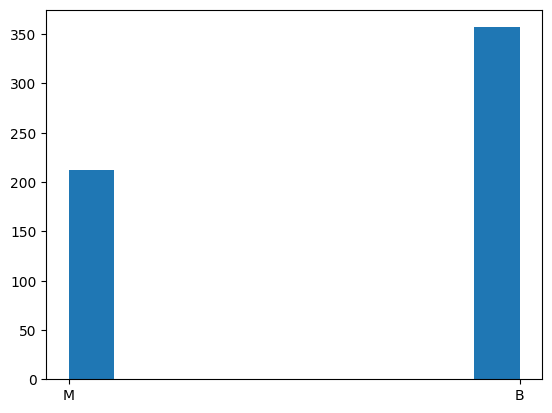

In [61]:
plt.hist(df['diagnosis'])

<Axes: >

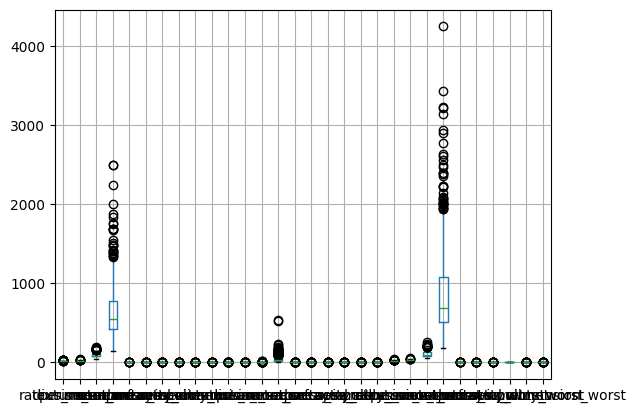

In [56]:
df.boxplot()

<Axes: xlabel='count', ylabel='diagnosis'>

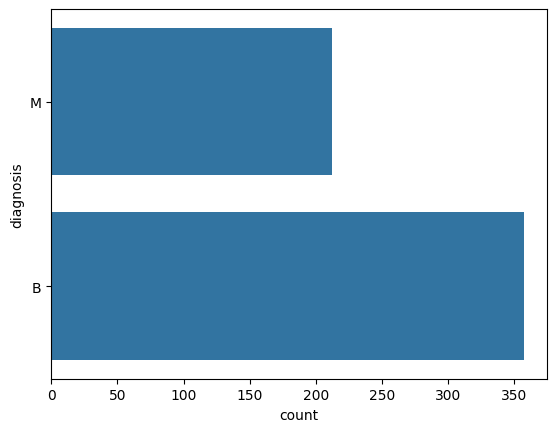

In [65]:
sns.countplot(df["diagnosis"])

<Axes: ylabel='radius_mean'>

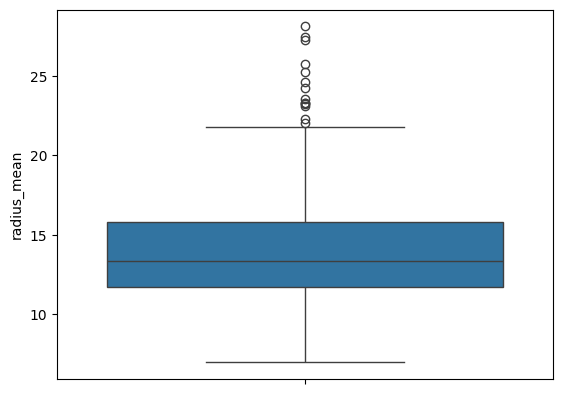

In [63]:
sns.boxplot(df['radius_mean'])

In [59]:
categorical_columns = df.select_dtypes(include = ['object', "category"]).columns
categorical_columns

Index(['diagnosis'], dtype='object')

MODULE 2

In [45]:
df = df.drop(['Unnamed: 32', "id"], axis = 1)

In [55]:
df = df.drop_duplicates()

In [52]:
# sns.pairplot(df)

In [ ]:
df_numeric = df.select_dtypes(include = ['int64', 'float64'])
print(df_numeric)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

BINNING AND TRANSFORMATION

In [ ]:
skewness_radius_mean = df["radius_mean"].skew()
if abs(skewness_radius_mean) > 0.5: # 0.5 is a rule of thumb
    print("col needs binning")

col needs binning


In [ ]:
len(df_numeric.columns)

31

In [ ]:
col_list = df_numeric.columns
skewed_count = 0
skewed_col = []

for i in col_list:
    if abs(df[i].skew()) > 0.5:
        print(i, "is skewed,", "needs binning")
        skewed_count = skewed_count + 1
        skewed_col.append(i)

print(skewed_count)

id is skewed, needs binning
radius_mean is skewed, needs binning
texture_mean is skewed, needs binning
perimeter_mean is skewed, needs binning
area_mean is skewed, needs binning
compactness_mean is skewed, needs binning
concavity_mean is skewed, needs binning
concave points_mean is skewed, needs binning
symmetry_mean is skewed, needs binning
fractal_dimension_mean is skewed, needs binning
radius_se is skewed, needs binning
texture_se is skewed, needs binning
perimeter_se is skewed, needs binning
area_se is skewed, needs binning
smoothness_se is skewed, needs binning
compactness_se is skewed, needs binning
concavity_se is skewed, needs binning
concave points_se is skewed, needs binning
symmetry_se is skewed, needs binning
fractal_dimension_se is skewed, needs binning
radius_worst is skewed, needs binning
perimeter_worst is skewed, needs binning
area_worst is skewed, needs binning
compactness_worst is skewed, needs binning
concavity_worst is skewed, needs binning
symmetry_worst is skewed

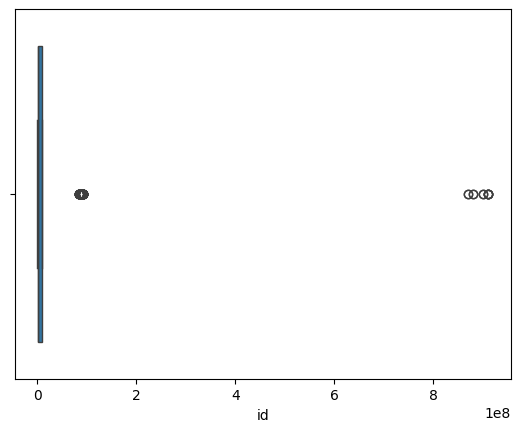

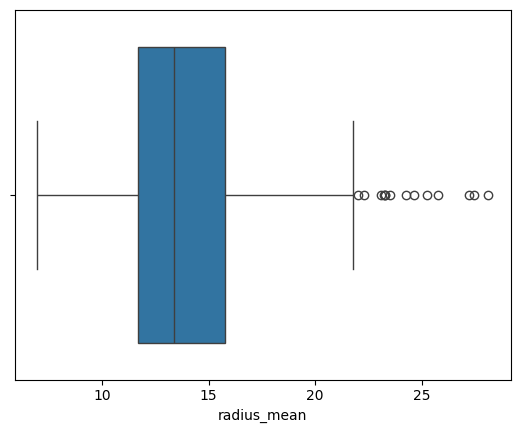

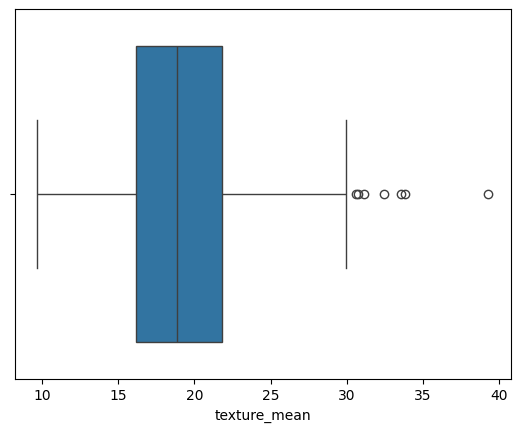

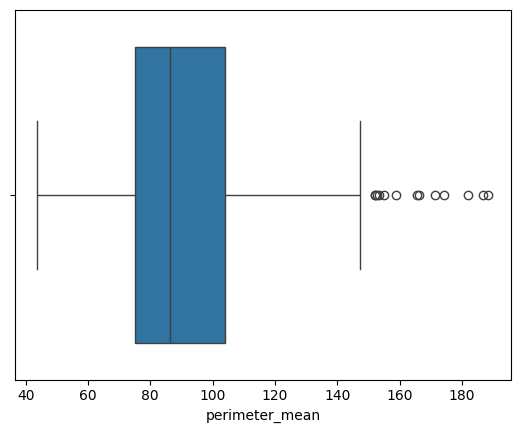

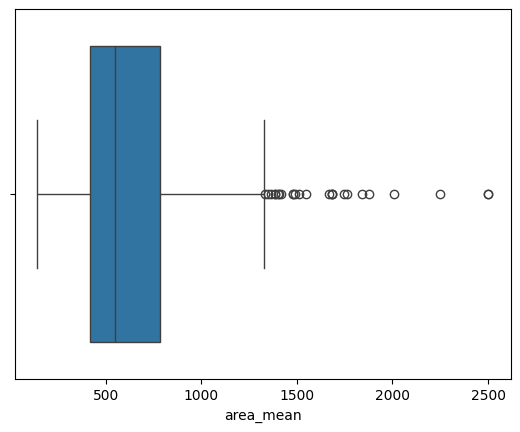

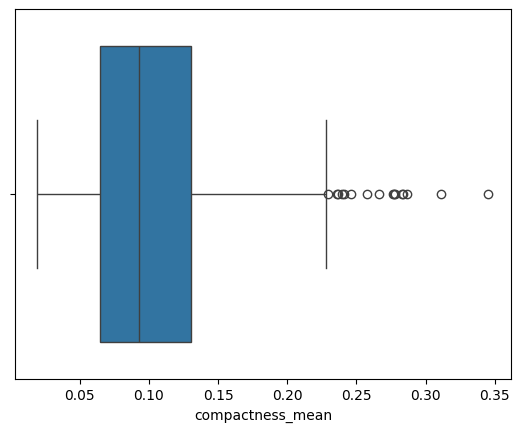

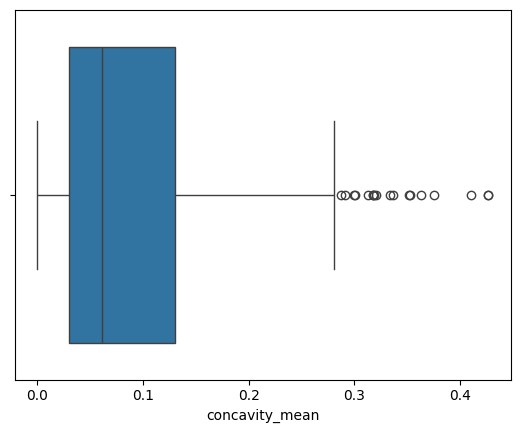

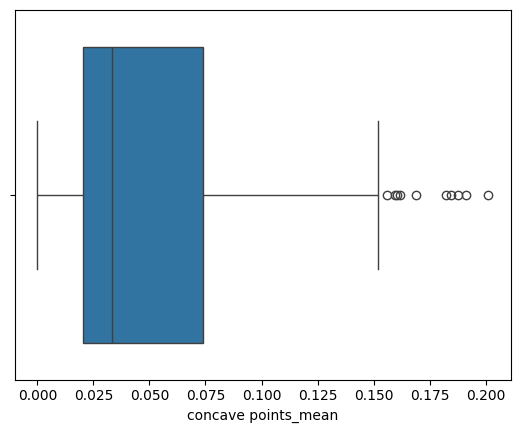

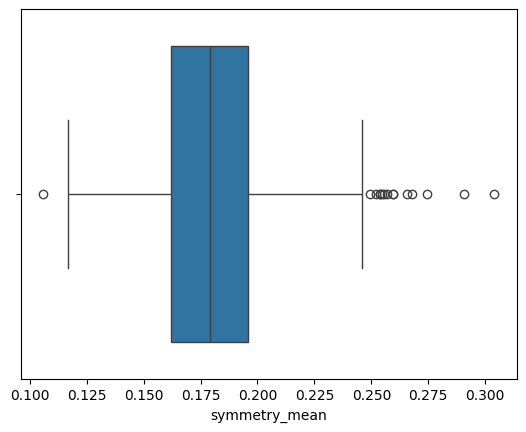

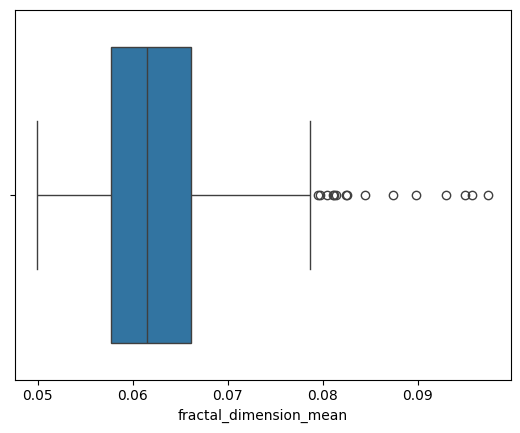

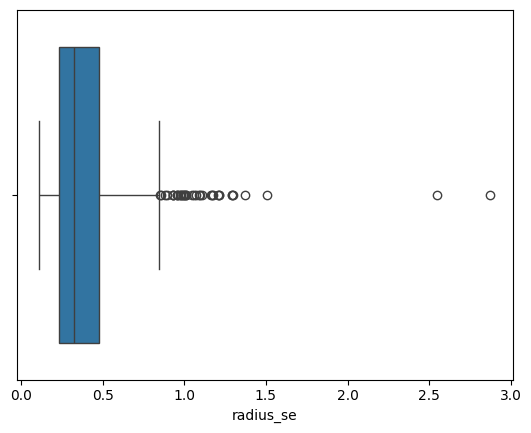

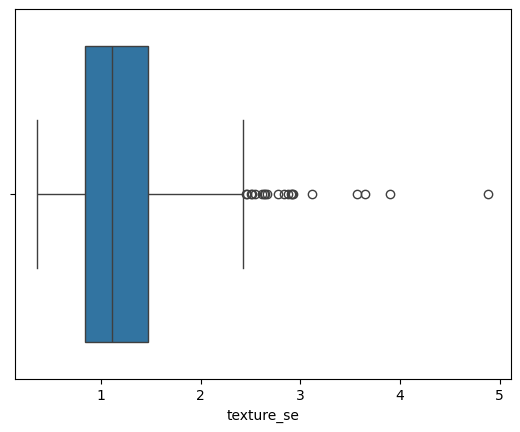

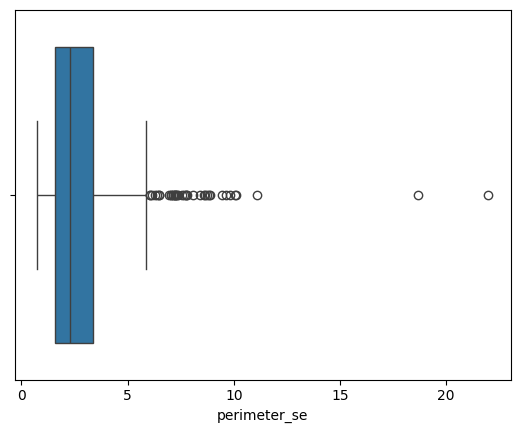

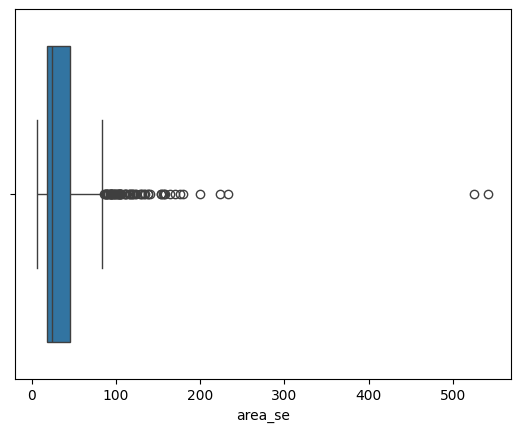

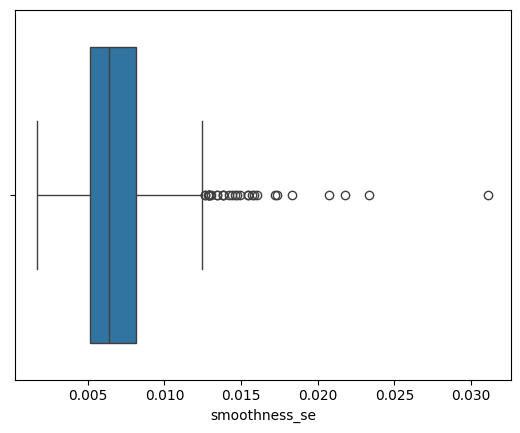

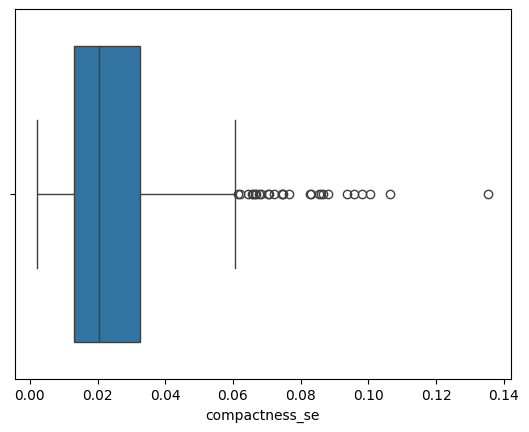

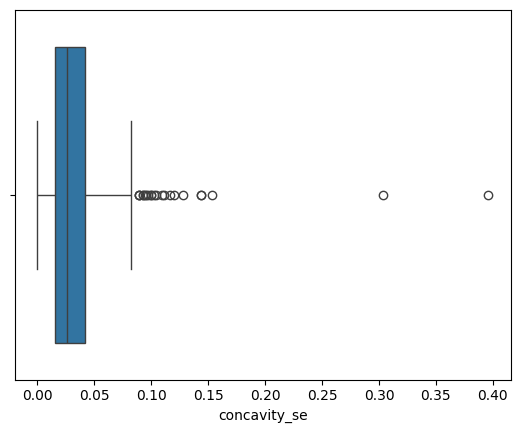

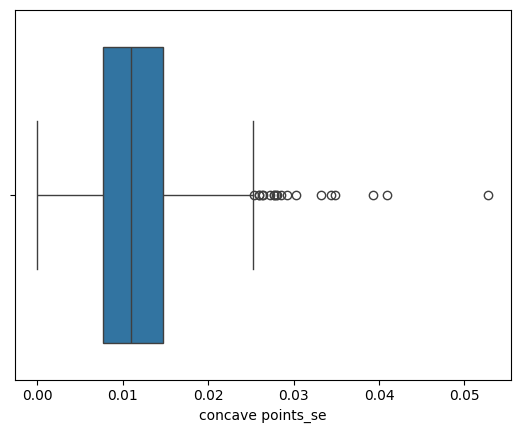

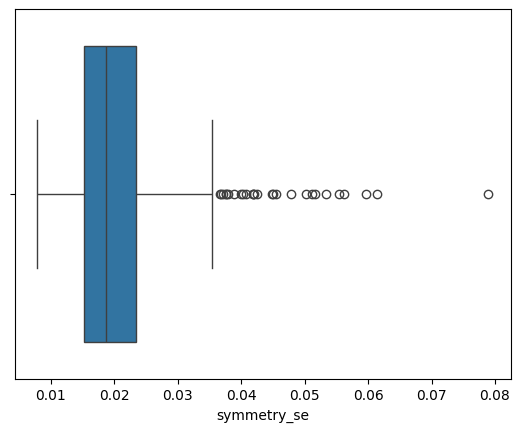

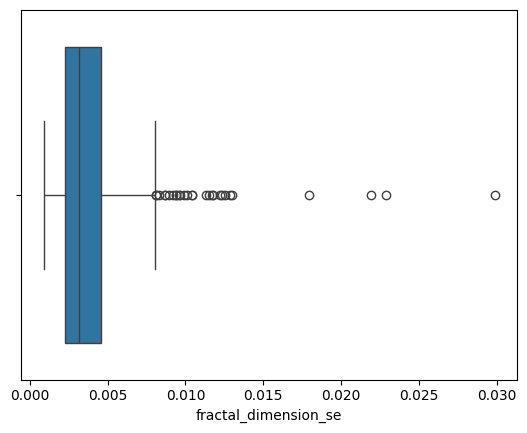

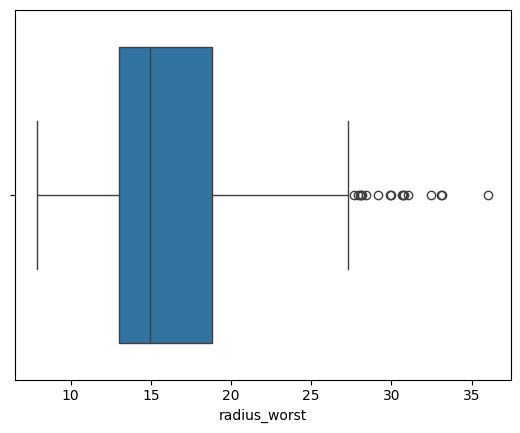

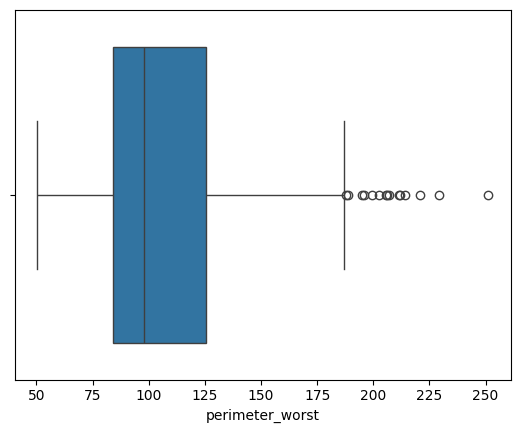

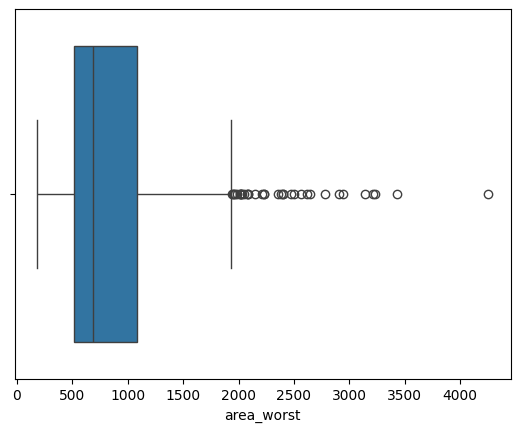

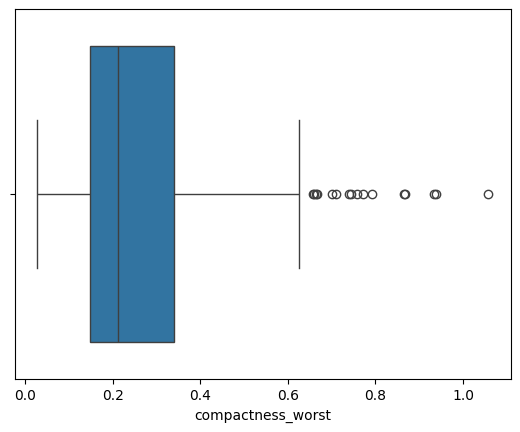

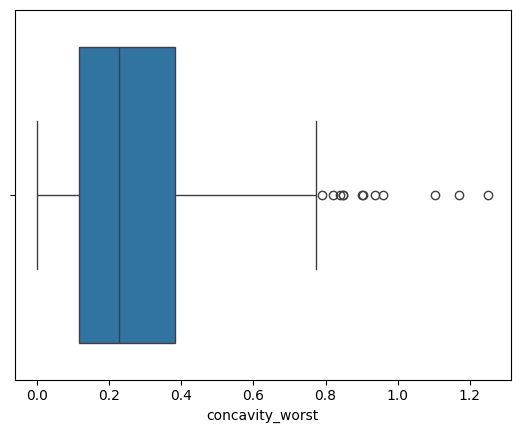

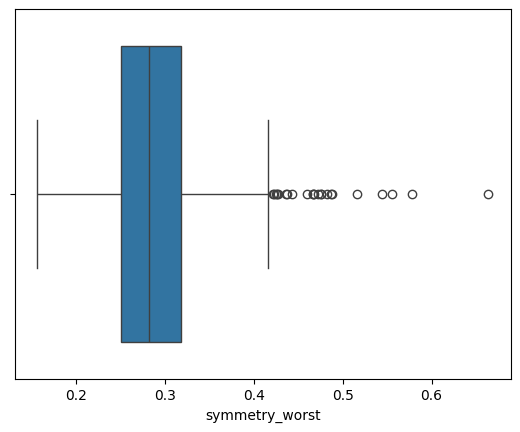

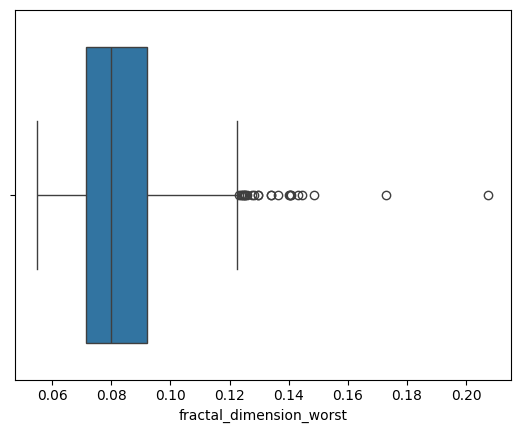

In [ ]:
for i in skewed_col:
    sns.boxplot(x = df[i])
    plt.show()

In [ ]:
skewed_col

['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
for i in skewed_col:
    df[i] = np.log1p(df[i])

In [ ]:
col_list = df.select_dtypes(include = ['int64', 'float64']).columns
skewed_count = 0
skewed_col = []

for i in col_list:
    if abs(df[i].skew()) > 0.5:
        print(i, "is skewed,", "needs binning")
        skewed_count = skewed_count + 1
        skewed_col.append(i)

print(skewed_count)

id is skewed, needs binning
compactness_mean is skewed, needs binning
concavity_mean is skewed, needs binning
concave points_mean is skewed, needs binning
symmetry_mean is skewed, needs binning
fractal_dimension_mean is skewed, needs binning
radius_se is skewed, needs binning
texture_se is skewed, needs binning
perimeter_se is skewed, needs binning
area_se is skewed, needs binning
smoothness_se is skewed, needs binning
compactness_se is skewed, needs binning
concavity_se is skewed, needs binning
concave points_se is skewed, needs binning
symmetry_se is skewed, needs binning
fractal_dimension_se is skewed, needs binning
radius_worst is skewed, needs binning
compactness_worst is skewed, needs binning
concavity_worst is skewed, needs binning
symmetry_worst is skewed, needs binning
fractal_dimension_worst is skewed, needs binning
21


In [ ]:
for i in skewed_col:
    df[i] = np.cbrt(df[i])

In [ ]:
col_list = df.select_dtypes(include = ['int64', 'float64']).columns
skewed_count = 0
skewed_col = []

for i in col_list:
    if abs(df[i].skew()) > 0.5:
        print(i, "is skewed,", "needs binning")
        skewed_count = skewed_count + 1
        skewed_col.append(i)

print(skewed_count)

id is skewed, needs binning
concave points_mean is skewed, needs binning
fractal_dimension_mean is skewed, needs binning
radius_se is skewed, needs binning
area_se is skewed, needs binning
smoothness_se is skewed, needs binning
compactness_se is skewed, needs binning
concave points_se is skewed, needs binning
symmetry_se is skewed, needs binning
fractal_dimension_se is skewed, needs binning
concavity_worst is skewed, needs binning
symmetry_worst is skewed, needs binning
fractal_dimension_worst is skewed, needs binning
13


In [ ]:
df.duplicated().any() # no duplicated rows

False

In [ ]:
for i in skewed_col:
    df[i], lambda_value = stats.boxcox(df[i] + 1)

In [ ]:
col_list = df.select_dtypes(include = ['int64', 'float64']).columns
skewed_count = 0

for i in col_list:
    if abs(df[i].skew()) > 0.5:
        print(i, "is skewed,", "needs binning")
        skewed_count = skewed_count + 1

print(skewed_count)

0


In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.308621,M,2.943913,2.431857,4.818667,6.909753,0.11840,0.625718,0.640242,0.788745,...,1.484674,17.33,5.223594,7.610853,0.16220,0.799054,1.985251,0.2654,0.192591,0.063895
1,0.308621,M,3.071303,2.932260,4.897093,7.190676,0.08474,0.423026,0.436784,0.574203,...,1.482419,23.41,5.073923,7.579168,0.12380,0.555150,1.185843,0.1860,0.187587,0.063817
2,0.309915,M,3.029650,3.102342,4.875197,7.093405,0.10960,0.529355,0.564781,0.742548,...,1.473847,25.53,5.033701,7.444249,0.14440,0.707285,1.601528,0.2430,0.190403,0.063812
3,0.309915,M,2.519308,3.062456,4.364117,5.958683,0.14250,0.629878,0.600222,0.682656,...,1.403892,26.50,4.603869,6.343353,0.20980,0.854513,1.952832,0.2575,0.195398,0.063958
4,0.309915,M,3.058237,2.730464,4.913390,7.168580,0.10030,0.499590,0.565304,0.680142,...,1.467246,16.67,5.031744,7.362645,0.13740,0.571317,1.513125,0.1625,0.185861,0.063763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.308655,M,3.116178,3.152309,4.962845,7.299797,0.11100,0.478650,0.602078,0.769453,...,1.485075,26.40,5.118592,7.614805,0.14100,0.576593,1.532403,0.2216,0.184187,0.063731
565,0.308655,M,3.050694,3.375880,4.884316,7.140453,0.09780,0.461664,0.512398,0.661936,...,1.474594,38.25,5.049856,7.457032,0.11660,0.560196,1.361942,0.1628,0.186838,0.063700
566,0.308655,M,2.867899,3.370051,4.694096,6.755885,0.08455,0.460099,0.445600,0.510087,...,1.441405,34.12,4.849684,7.025538,0.11390,0.645986,1.399853,0.1418,0.185098,0.063771
567,0.308655,M,3.072693,3.412137,4.949469,7.143618,0.11780,0.625318,0.670281,0.799988,...,1.486721,39.42,5.223594,7.507690,0.16500,0.854952,2.249867,0.2650,0.191554,0.063904


bin first and then normalize

Checking if data follows gaussian distribution

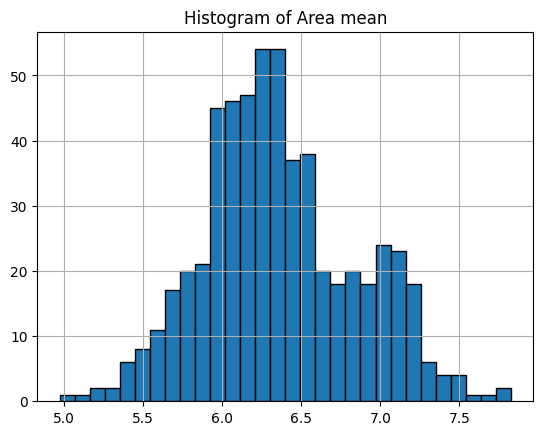

In [ ]:
df["area_mean"].hist(bins = 30, edgecolor = 'black')
plt.title("Histogram of Area mean")
plt.show()

In [ ]:
skew_compactness_mean = df["compactness_mean"].skew()
kurt_compactness_mean = df["compactness_mean"].kurtosis()

print(skew_compactness_mean, kurt_compactness_mean)

0.28904516561250665 -0.3082470687104837


In [ ]:
scaler = StandardScaler()
std_data = scaler.fit_transform(df[["compactness_mean"]])

std_data

array([[ 2.48792523],
       [-0.38744411],
       [ 1.1209206 ],
       [ 2.54694134],
       [ 0.69867713],
       [ 1.26446414],
       [ 0.27111513],
       [ 1.18712644],
       [ 1.5710449 ],
       [ 2.10714881],
       [-0.69757639],
       [ 0.6378522 ],
       [ 2.17242499],
       [ 0.09559209],
       [ 1.99568397],
       [ 1.11509564],
       [-0.55526049],
       [ 1.68235013],
       [ 0.14656312],
       [-0.32329315],
       [ 0.60005943],
       [-0.74679718],
       [ 1.81677241],
       [ 0.13644173],
       [ 0.90702036],
       [ 1.97690823],
       [ 1.48942934],
       [ 0.22430241],
       [ 1.26029523],
       [ 0.39792371],
       [ 1.5138812 ],
       [ 0.99772292],
       [ 0.96727853],
       [ 1.2907378 ],
       [ 1.0621671 ],
       [ 0.71202691],
       [ 0.28655177],
       [-1.66274874],
       [-1.16103076],
       [ 0.57401252],
       [-0.87960568],
       [ 0.50876398],
       [ 1.8801968 ],
       [ 0.87407061],
       [ 0.1866933 ],
       [ 1

MODULE 3

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

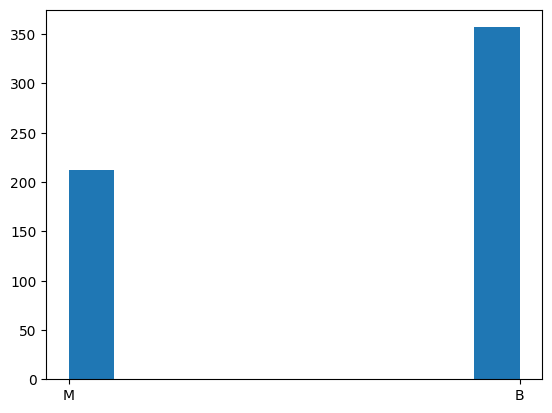

In [48]:
# univariate analysis
plt.hist(df["diagnosis"])

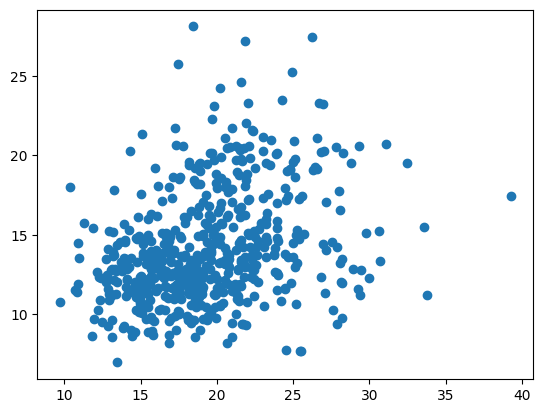

In [49]:
# bivariate analysis
plt.scatter(df["texture_mean"], df["radius_mean"])

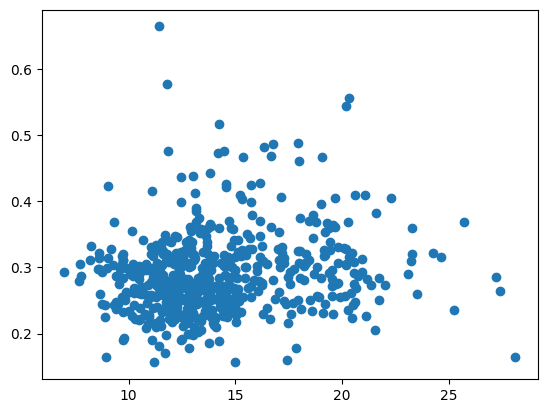

In [70]:
plt.scatter(df["radius_mean"], df["symmetry_worst"])

In [ ]:
df_nodiag = df.drop("diagnosis", axis = 1)######## change to numeric

<Axes: >

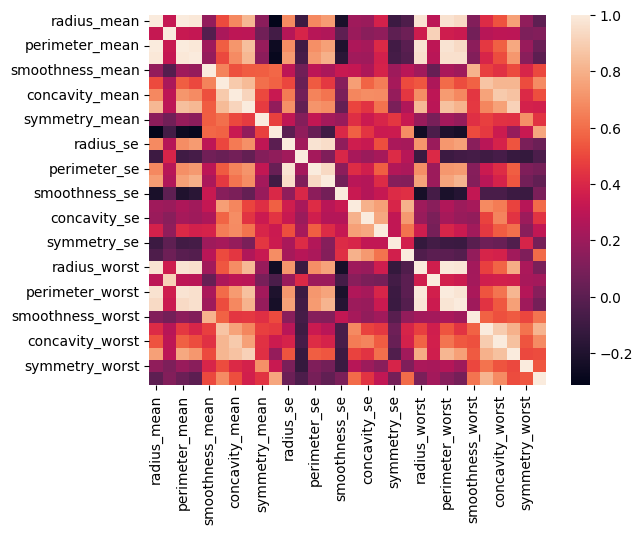

In [51]:
sns.heatmap(df_nodiag.corr())